In [33]:
# Import modules
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Define data filepath
pathname = './'

# Read data
df = gpd.read_file(pathname + 'or_1992-2018.shp') # 'df' stands for DataFrame

In [44]:
df_small = df[df['FIRE_SIZE'] > 50]

df_small_human = df_small[df_small['NWCG_CAUSE'] == 'Human']

df_small_group = df_small['FIRE_SIZE'].groupby(df_small_human['FIPS_NAME']).count()

df_small_group.sort_values(ascending=False)



FIPS_NAME
Wasco County         71
Malheur County       49
Douglas County       40
Umatilla County      40
Klamath County       34
Harney County        31
Jefferson County     30
Wheeler County       28
Grant County         28
Jackson County       25
Deschutes County     22
Baker County         22
Sherman County       20
Josephine County     20
Gilliam County       19
Lane County          18
Lake County          18
Union County         14
Morrow County        11
Wallowa County       10
Crook County         10
Curry County          9
Coos County           8
Marion County         7
Lincoln County        6
Hood River County     5
Linn County           5
Benton County         5
Polk County           4
Clackamas County      4
Multnomah County      3
Clatsop County        3
Washington County     2
Klickitat County      2
Adams County          1
Tillamook County      1
Columbia County       1
Yamhill County        1
Name: FIRE_SIZE, dtype: int64

a) Wasco County with 71 fires.

In [21]:
df_large = df[df['FIRE_SIZE'] > 100]
df_large_natural = df_large[df_large['NWCG_CAUSE'] == 'Natural']

df_large_natural['DISCOVERY_']

datetime = pd.to_datetime(df_large_natural['DISCOVERY_'], format='%Y/%m/%d %H:%M:%S.%f')


df_large_natural['datetime'] = datetime
large_fire_count = df_large.iloc[:,0].groupby(df_large_natural['datetime'].dt.month).count().sort_values(ascending=False)

large_fire_count


C:\Users\clynn\anaconda3\envs\lab2\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


datetime
8.0     549
7.0     410
6.0      98
9.0      93
5.0       6
10.0      6
4.0       2
Name: OBJECTID, dtype: int64

b) August was the month with the most natural fires that are more than 100 acres. 

In [36]:
df_larger = df[df['FIRE_SIZE'] > 200]
df_larger_undetermined = df_larger[df_larger['NWCG_CAUSE'] == 'Missing data/not specified/undetermined'].count()
df_larger_undetermined['DISCOVERY_']

13

c) There was 13 fires bigger than 200 arces classificated as undetermined.

In [80]:
df_fires = df['FIRE_SIZE'].max()
df_fires

max_fire = df.loc[df['FIRE_SIZE'] == df_fires]
max_fire.iloc[:,[13,20,29,37]].head()

,FIRE_NAME,DISCOVERY_,FIRE_SIZE,FIPS_NAME
66964,LONG DRAW,2012/07/08 00:00:00.000,558198.3,Malheur County


d) The largest fire is called Long Draw. It was in Malheur County and discovered in 07/08/2012.

In [91]:
df_small = df[df['FIRE_SIZE'] > 50]
df_county = df_small[df_small['FIPS_NAME'] == 'Lane County']
index = df_county.index
fires = len(index)
fires

33

e) There was 33 fires more than 50 arces in Lane County.

**Part 2**

In [ ]:
from cenpy import products
import matplotlib.pyplot as plt
%matplotlib inline

# Define product
acs = products.ACS(2017)

In [68]:
# Download data
marion_pop = products.ACS(2019).from_county('marion County, OR', level='tract',
                                        variables=['B01003_001E'])

C:\Users\clynn\anaconda3\envs\lab2\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\clynn\anaconda3\envs\lab2\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\clynn\anaconda3\envs\lab2\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` paramete

In [69]:
# Calculate some stats
marion_pop['B01003_001E'].describe()

count       58.000000
mean      5855.879310
std       2224.202101
min       1525.000000
25%       4468.750000
50%       5782.500000
75%       6990.500000
max      11319.000000
Name: B01003_001E, dtype: float64

<AxesSubplot:>

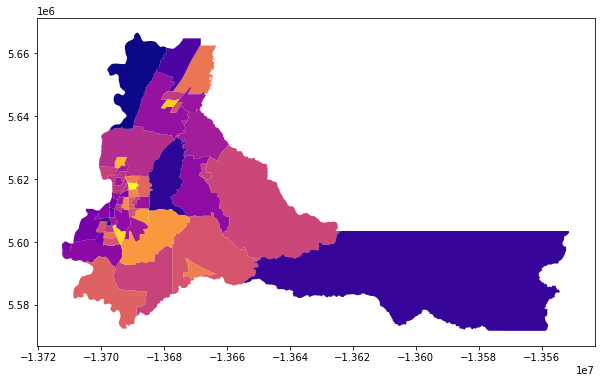

In [79]:
# Plot map
f, ax = plt.subplots(1, 1, figsize=(10,10))
marion_pop.plot('B01003_001E', ax=ax, cmap='plasma')


<AxesSubplot:>

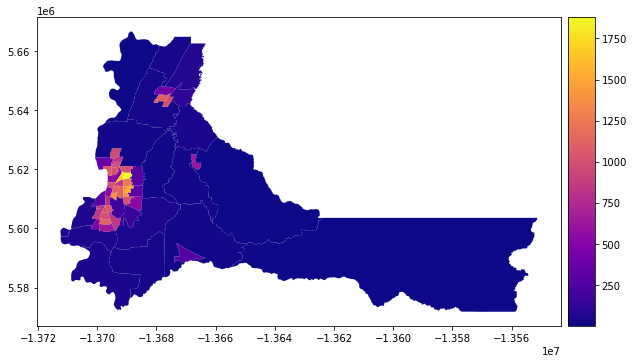

In [80]:
marion_pop['pop_density'] = marion_pop['B01003_001E'] / (marion_pop['geometry'].area / 1e+6)

from mpl_toolkits.axes_grid1 import make_axes_locatable

# Plot map
f, ax = plt.subplots(1, 1, figsize=(10,10))

# These two lines make the colorbar the same size as the axes.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

marion_pop.plot('pop_density', ax=ax, cmap='plasma', legend=True, cax=cax)